In [31]:
import time
import itertools as it

import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from IPython import display

from Node.functions import *
from Node.Node import Control_node
from Plant.Plant import Plant

In [32]:
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
# behavioral matrix (maps previous behavior to future behavior commands - how should I behave?)
B1 = np.array([[1]])
B2 = np.array([[1]])

# state/system matrix (maps previous state to future state - how will others behave (give past behaviors)?)
A1 = np.array([[1]])
A2 = np.array([[1]])

# reference matrix (how do I expect/want others to behave? target values)
R1 = np.array([1.5])
R2 = np.array([-1.5])

# Initial behavior
behav_1 = np.array([-2.5])
behav_2 = np.array([2.5])

# transition matrix (maps control signal and previous state to current state - what behaviors do I enact given my intentions?)
T1 = np.array([0.2])
T2 = np.array([0.2])


# get the state observation (behaviors of others)
def sense(inputs):
    perception = inputs
    return perception

# contrast reference with observations (and potentially incorporate predictions from internal model)
def compare(sensory_signal, reference, prediction):
    error = reference - sensory_signal
    return error

# generate a control signal
def control(error, behavioral_model, previous_output):
    control_signal = chaotic_controller(behavioral_model, .02, error)
    return control_signal

# dictates how control commands determine state transitions - i.e. behaviors
def transition(control_signal, transition_matrix, state):
    new_state = (transition_matrix * control_signal) + state
    return new_state


# adjusts behavioral model to get closer to behavior given 
def control_update(error, behavioral_model, previous_output):
    # LMS algorithm
    learning_rate = 0.0
    #behavioral_model = behavioral_model + learning_rate * error * previous_output
    return behavioral_model

# adjusts reference given error
def reference_update_102(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = adjustable_sigmoid(sqr_error, .1)*(reference - error) + (1-adjustable_sigmoid(sqr_error, .1))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

def reference_update_104(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = adjustable_sigmoid(sqr_error, 1)*(reference - error) + (1-adjustable_sigmoid(sqr_error, 1))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

def reference_update_108(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = adjustable_sigmoid(sqr_error, 10)*(reference - error) + (1-adjustable_sigmoid(sqr_error, 10))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

def reference_update_116(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = adjustable_sigmoid(sqr_error, 100)*(reference - error) + (1-adjustable_sigmoid(sqr_error, 100))*(R1)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

def reference_update_202(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = adjustable_sigmoid(sqr_error, .1)*(reference - error) + (1-adjustable_sigmoid(sqr_error, .1))*(R2)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

def reference_update_204(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = adjustable_sigmoid(sqr_error, 1)*(reference - error) + (1-adjustable_sigmoid(sqr_error, 1))*(R2)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

def reference_update_208(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = adjustable_sigmoid(sqr_error, 10)*(reference - error) + (1-adjustable_sigmoid(sqr_error, 10))*(R2)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

def reference_update_216(reference, error):
    # reference = (matrix_sigmoid(error)-1)*(R1) + matrix_sigmoid(error)*(reference + error)
    sqr_error = np.square(error)
    reference = adjustable_sigmoid(sqr_error, 100)*(reference - error) + (1-adjustable_sigmoid(sqr_error, 100))*(R2)
    # k = 0.1
    # k =  zero_sigmoid(error)
    # reference = reference - (error * k)
    return reference

    


# generate predictions on next state
def imc(system_estimate, previous_state, behavioral_model, previous_output):
    # actual estimate
    state = (system_estimate * previous_state) + (behavioral_model * previous_output)
    return state

# adjust system estimate to infer observations given my behavior
def imc_update(inputs, system_estimate, previous_behavior, behavioral_model, previous_state, learning_rate):
    # actual estimate
    #curr_system_est = (system_estimate @ previous_state) + (behavioral_model @ previous_behavior)
    #error = curr_system_est - inputs
    #learning_rate = 0.01
    #system_estimate = system_estimate + learning_rate * error * previous_behavior
    return system_estimate


agent102 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_102,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)
plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

agent104 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_104,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

agent108 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_108,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)

agent116 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_116,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
system_estimate=A1, reference=R1, init_behavior=behav_1)



agent202 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_202,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)
plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

agent204 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_204,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

agent208 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_208,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

agent216 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_216,
controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
system_estimate=A2, reference=R2, init_behavior=behav_2)

### Individual Experiments


 Sigmoid Model Agents (Error Relative to Expectation)
Agent 1 base reference: [1.5]
Agent 2 base reference: [-1.5]


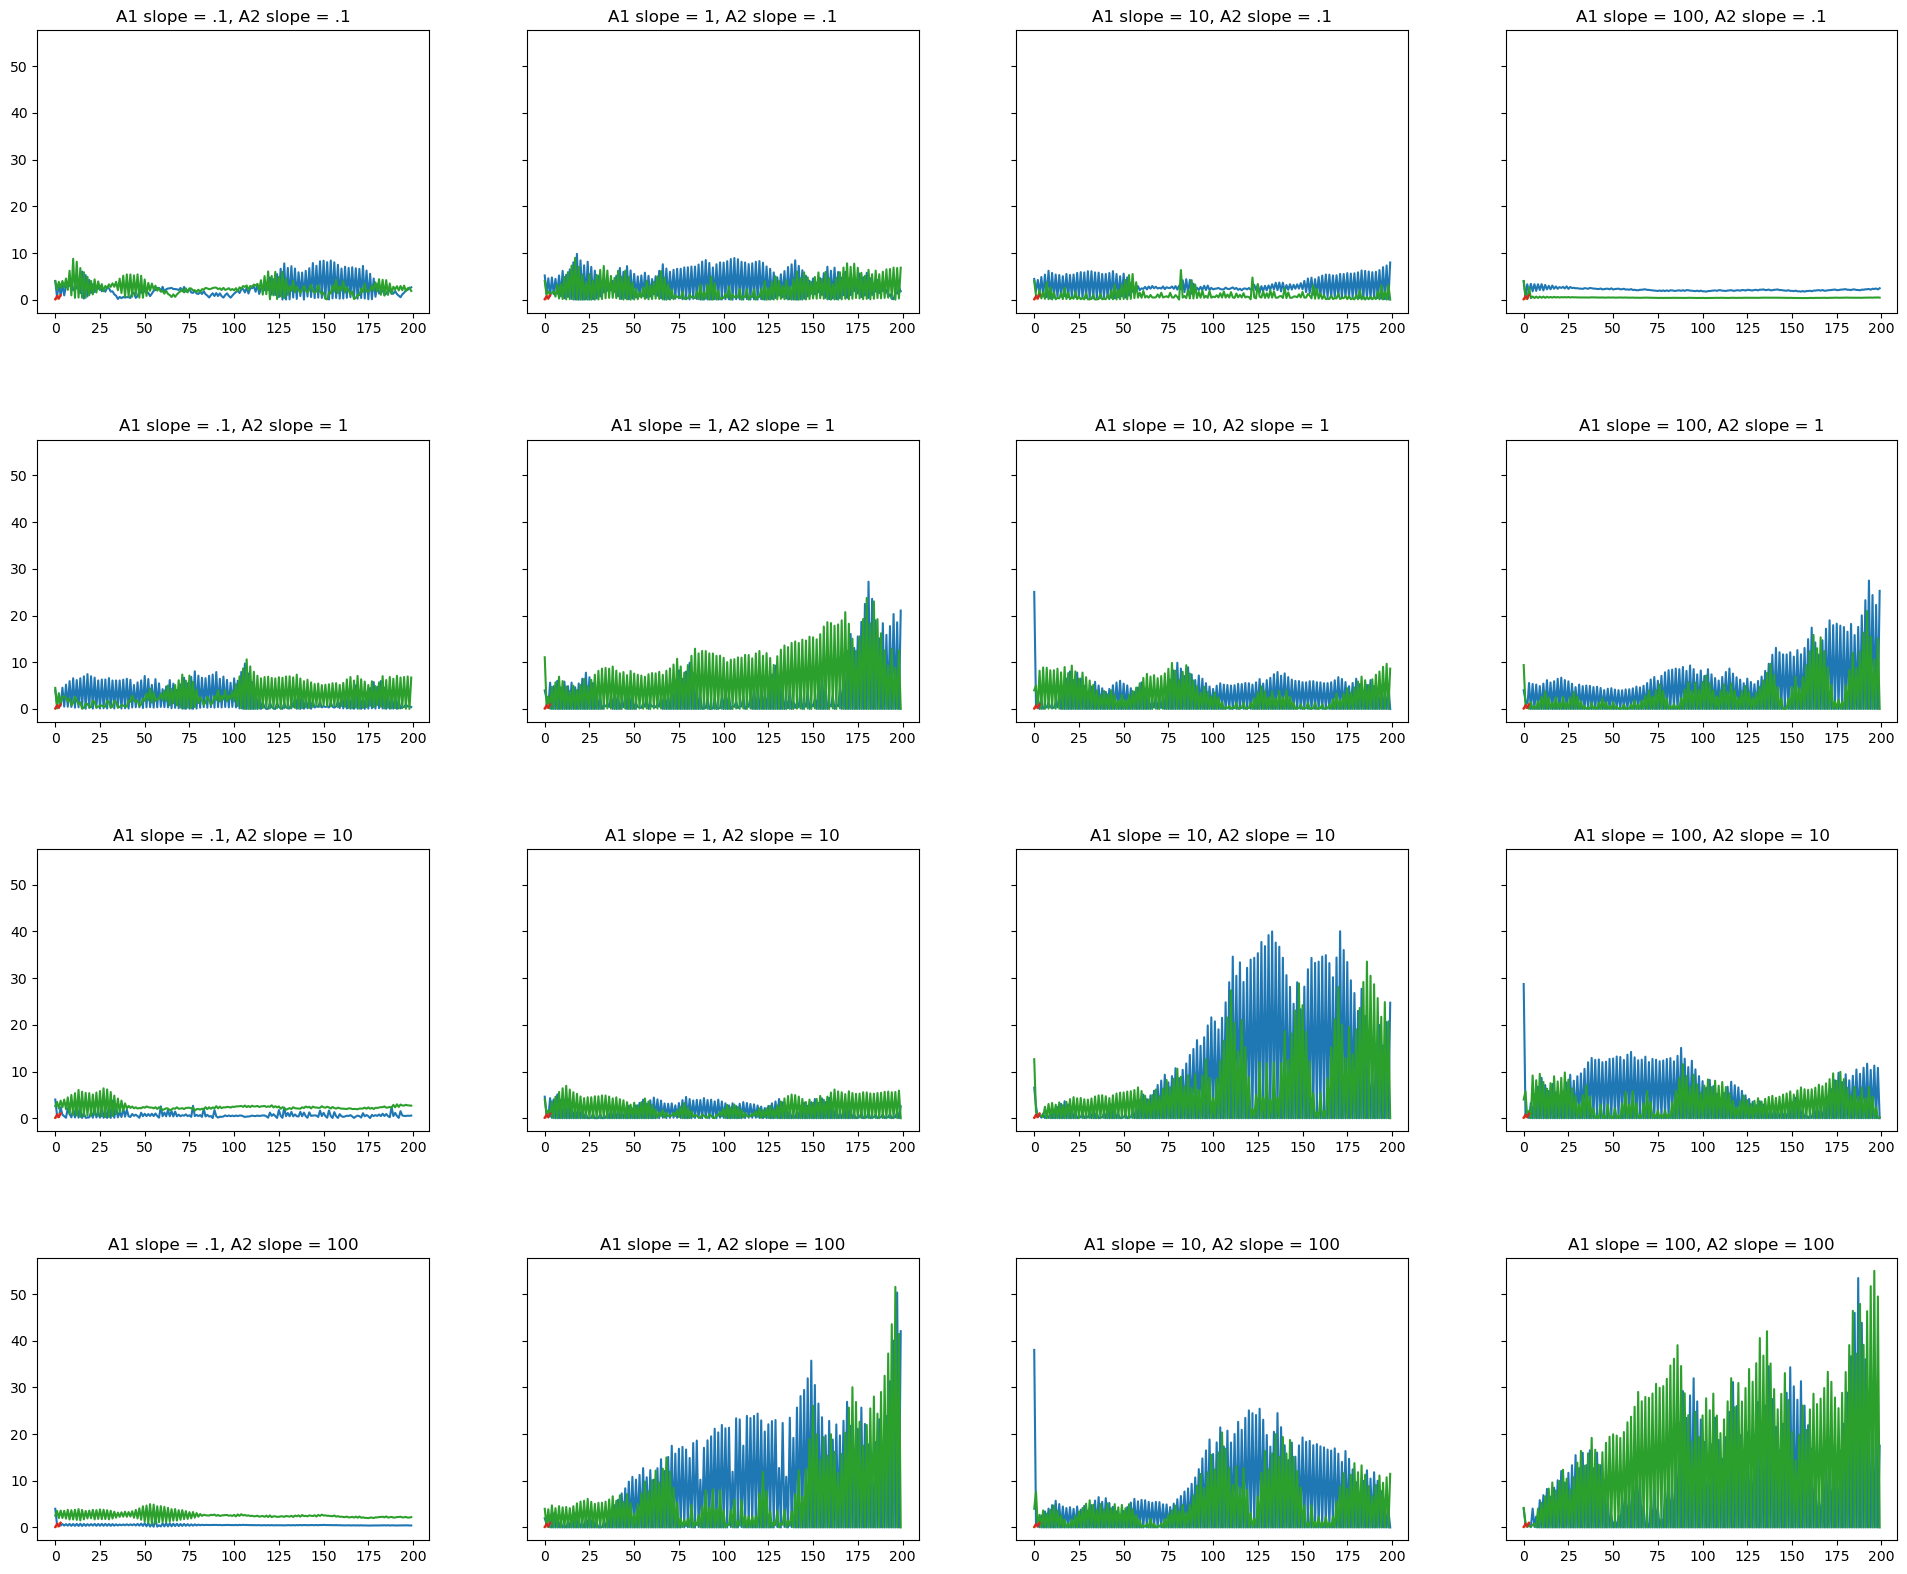

In [33]:
np.random.seed(31)
w = 6; h = 5
ncols = 4
nrows = 4
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_slope = [".1","1", "10", "100"]
agents1 = [agent102,agent104,agent108,agent116]
agents2 = [agent202,agent204,agent208,agent216]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 200
time = [i for i in range(trials)]

for ix, param in enumerate(param_vals):
    # experiments
    agent102 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_102,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)
    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

    agent104 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_104,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    agent108 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_108,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    agent116 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_116,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)



    agent202 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_202,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

    agent204 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_204,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    agent208 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_208,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    agent216 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_216,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)
    b1 = behav_1
    b2 = behav_2

    agent2 = agents1[param%4]
    agent1 = agents2[int(((param - (param%4)))/ncols)]
    agent1_error = []
    agent2_error = []
    for t in range(trials):
        color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
        color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
        #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
        #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        # agent1_control.append(agent1.get_output())
        # agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)

        # agent1_behaviors.append(b1)
        # agent2_behaviors.append(b2)

        agent1_error.append(np.absolute(agent1.get_error()))
        agent2_error.append(np.absolute(agent2.get_error()))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, agent1_error, color1)
    ax[ai].plot(time, agent2_error, color2)
    ax[ai].set_title('A1 slope = {}, A2 slope = {}'.format(agents_slope[param%4], agents_slope[int(((param - (param%4)))/ncols)]))
    # ax[ai].set_xlim(0,t)
    # ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
print("Agent 1 base reference: {}".format(R1))
print("Agent 2 base reference: {}".format(R2))
plt.show()


 Sigmoid Model Agents (Error Relative to Base Preference)
Agent 1 base reference: [1.5]
Agent 2 base reference: [-1.5]


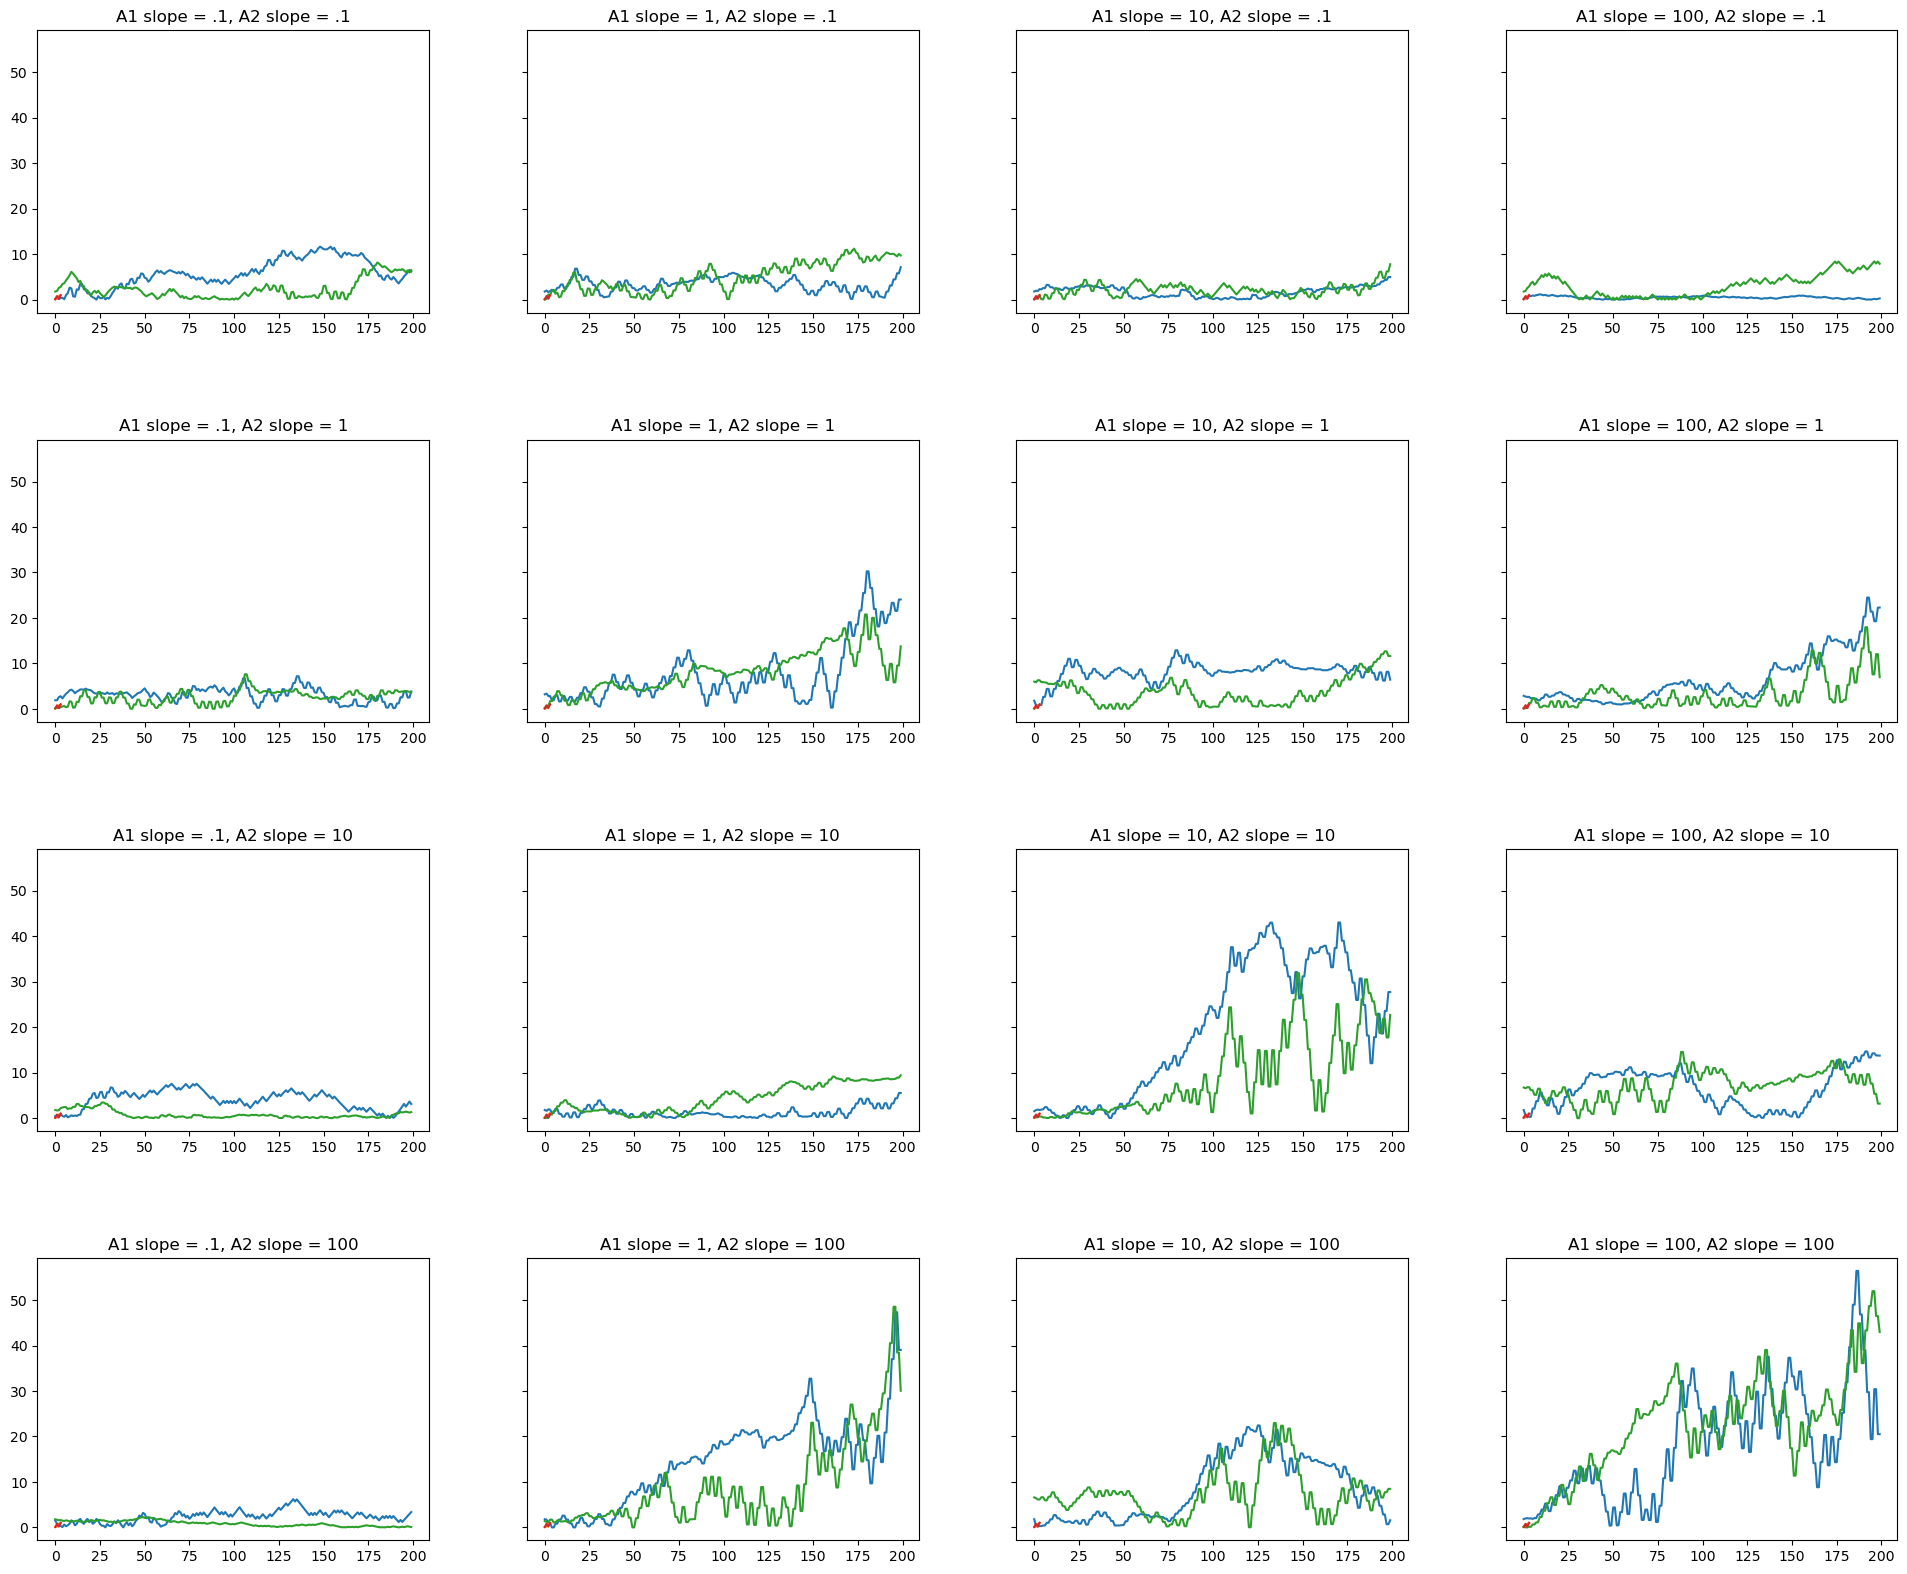

In [34]:


np.random.seed(31)
w = 6; h = 5
ncols = 4
nrows = 4
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_slope = [".1","1", "10", "100"]
agents1 = [agent102,agent104,agent108,agent116]
agents2 = [agent202,agent204,agent208,agent216]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
trials = 200
time = [i for i in range(trials)]


for ix, param in enumerate(param_vals):
    # experiments
    b1 = behav_1
    b2 = behav_2
    agent102 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_102,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)
    plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

    agent104 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_104,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    agent108 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_108,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)

    agent116 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_116,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
    system_estimate=A1, reference=R1, init_behavior=behav_1)



    agent202 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_202,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)
    plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

    agent204 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_204,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    agent208 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_208,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    agent216 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_216,
    controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
    system_estimate=A2, reference=R2, init_behavior=behav_2)

    agent2 = agents1[param%4]
    agent1 = agents2[int(((param - (param%4)))/ncols)]
    agent1_error = []
    agent2_error = []
    for t in range(trials):
        color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
        color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
        #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
        #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
        b1_control = agent1.go(b2)   
        b2_control = agent2.go(b1)

        # agent1_control.append(agent1.get_output())
        # agent2_control.append(agent2.get_output())

        b1 = plant1.transition(b1_control)
        b2 = plant2.transition(b2_control)

        # agent1_behaviors.append(b1)
        # agent2_behaviors.append(b2)

        agent1_error.append(np.absolute(R1-b2))
        agent2_error.append(np.absolute(R2-b1))

        # agent1_reference.append(agent1.get_reference()[0])
        # agent2_reference.append(agent2.get_reference()[0])

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, agent1_error, color1)
    ax[ai].plot(time, agent2_error, color2)
    ax[ai].set_title('A1 slope = {}, A2 slope = {}'.format(agents_slope[param%4], agents_slope[int(((param - (param%4)))/ncols)]))
    # ax[ai].set_xlim(0,t)
    # ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Base Preference)")
print("Agent 1 base reference: {}".format(R1))
print("Agent 2 base reference: {}".format(R2))
plt.show()

### Aggregate Experiments


 Sigmoid Model Agents (Error Relative to Expectation)
Agent 1 base reference: [1.5]
Agent 2 base reference: [-1.5]


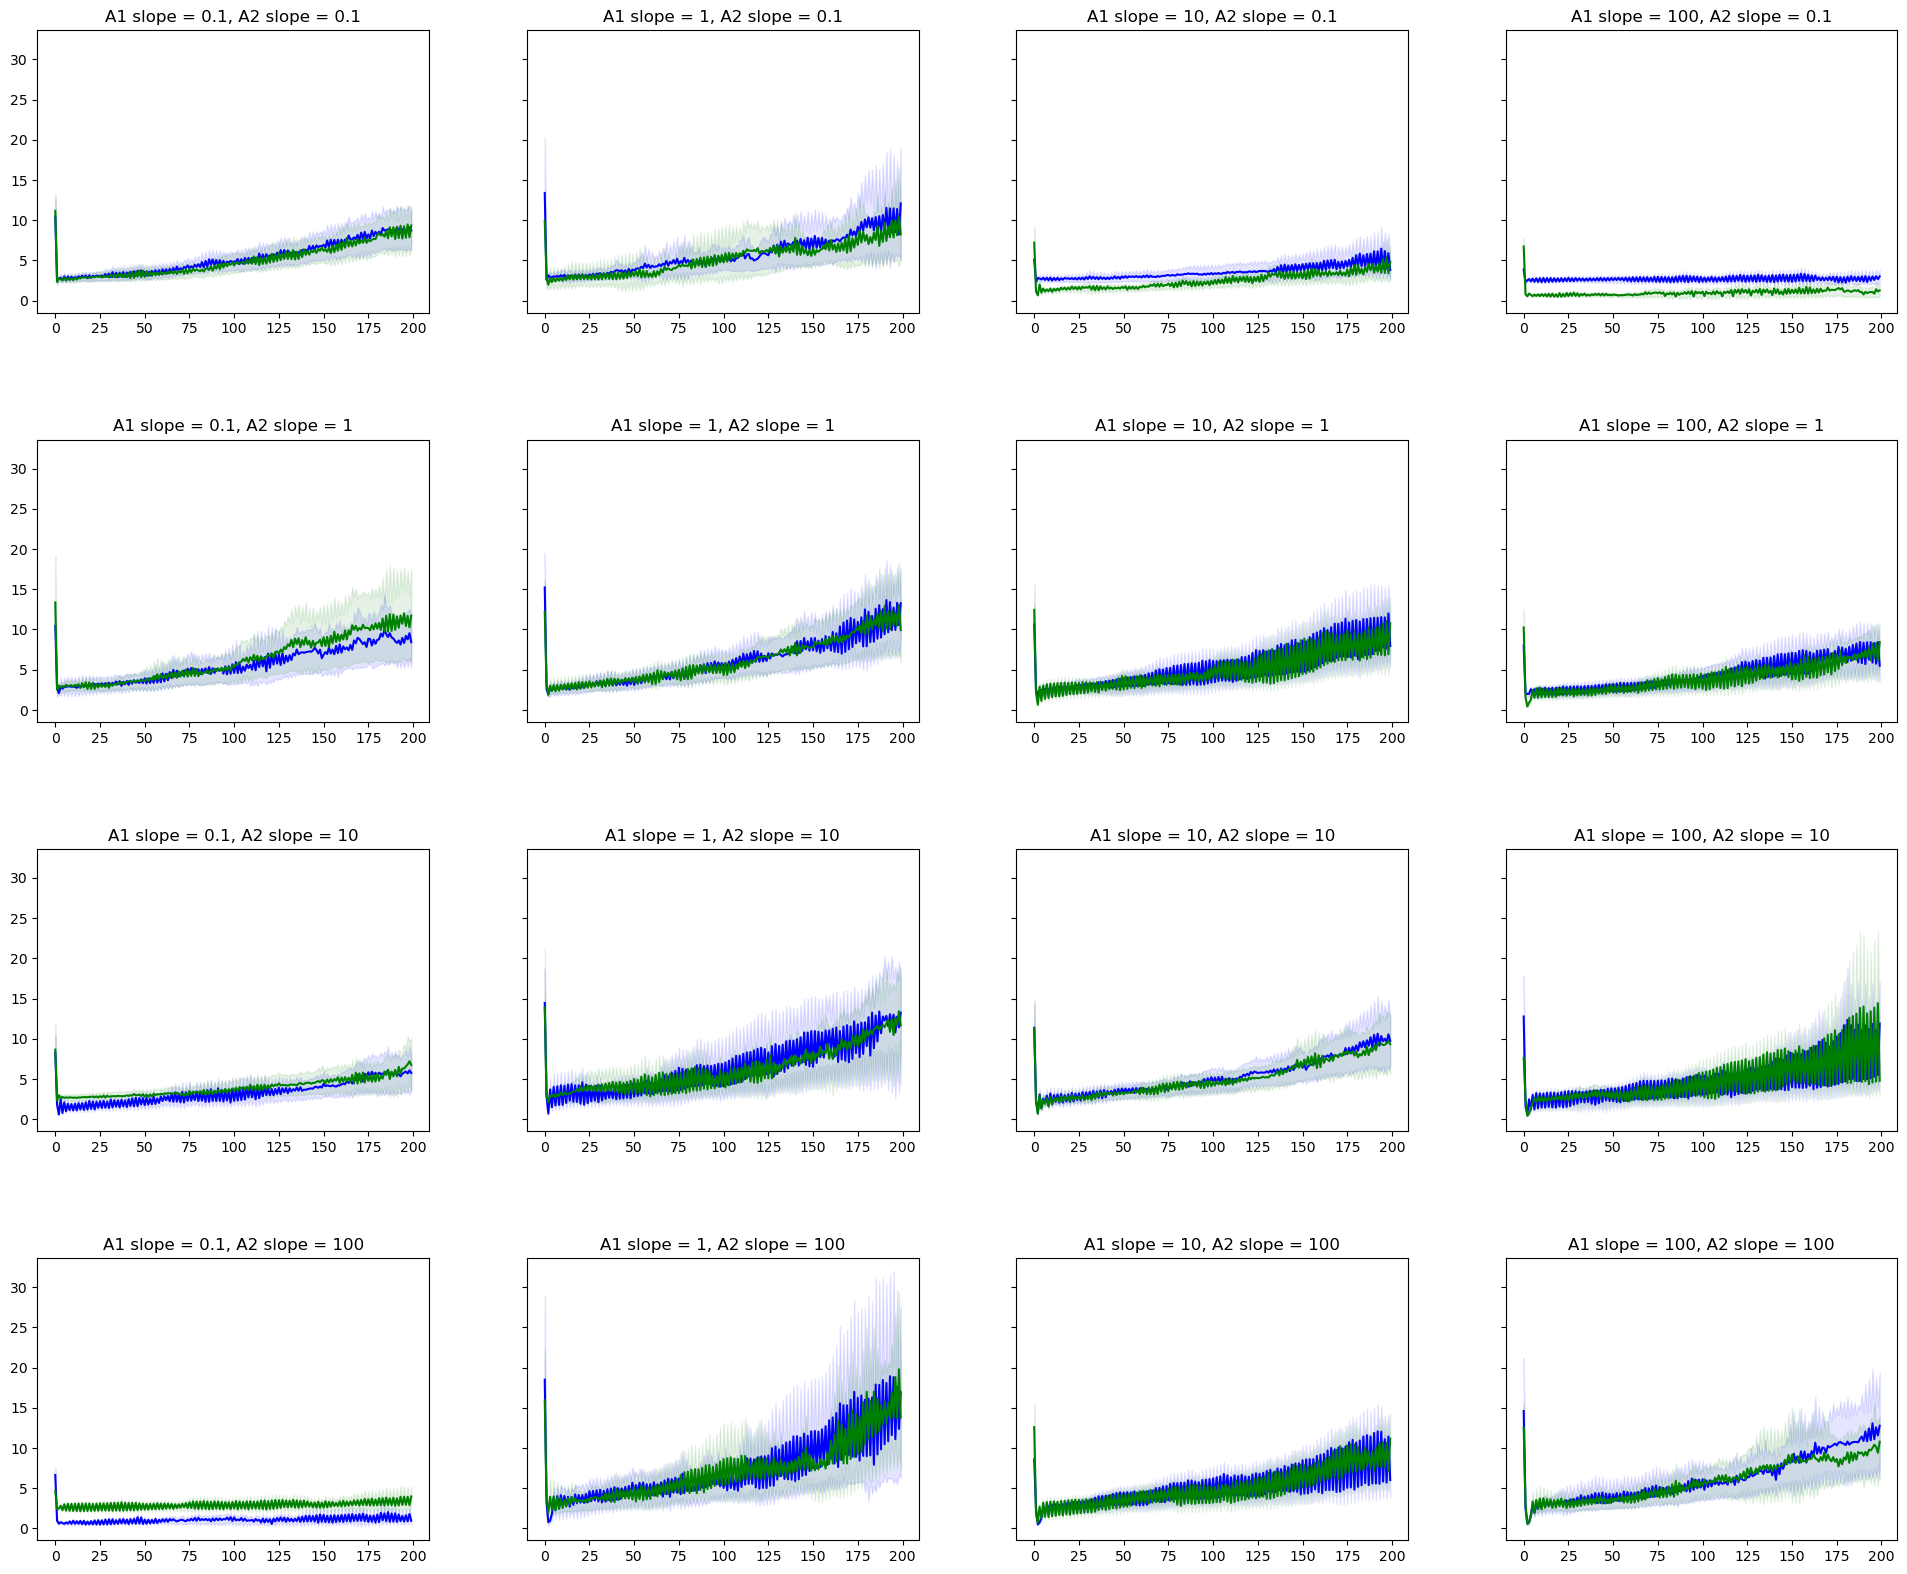

In [35]:
# np.random.seed(181)
w = 6; h = 5
ncols = 4
nrows = 4
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_slope = ["0.1","1", "10", "100"]
agents1 = [agent102,agent104,agent108,agent116]
agents2 = [agent202,agent204,agent208,agent216]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
experiments = 200
trials = 200
time = [i for i in range(trials)]

for ix, param in enumerate(param_vals):
    agent1_errors = []
    agent2_errors = []
    for e in range(experiments):
        # experiments
        agent102 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_102,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)
        plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

        agent104 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_104,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)

        agent108 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_108,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)

        agent116 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_116,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)



        agent202 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_202,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=behav_2)
        plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

        agent204 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_204,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=behav_2)

        agent208 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_208,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=behav_2)

        agent216 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_216,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=behav_2)
        b1 = behav_1
        b2 = behav_2

        agent2 = agents1[param%4]
        agent1 = agents2[int(((param - (param%4)))/ncols)]
        agent1_error = []
        agent2_error = []
        for t in range(trials):
            color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
            color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
            #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
            #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
            b1_control = agent1.go(b2)   
            b2_control = agent2.go(b1)

            # agent1_control.append(agent1.get_output())
            # agent2_control.append(agent2.get_output())

            b1 = plant1.transition(b1_control)
            b2 = plant2.transition(b2_control)

            # agent1_behaviors.append(b1)
            # agent2_behaviors.append(b2)

            agent1_error.append(np.absolute(agent1.get_error()))
            agent2_error.append(np.absolute(agent2.get_error()))

            # agent1_reference.append(agent1.get_reference()[0])
            # agent2_reference.append(agent2.get_reference()[0])
        # aggregate the errors across experiments
        agent1_errors.append(agent1_error)
        agent2_errors.append(agent2_error)

    error1_mat = np.array(agent1_errors)
    error2_mat = np.array(agent2_errors)

    mean_error1 = np.average(error1_mat, axis=0)
    mean_error2 = np.average(error2_mat, axis=0)
    std_error1  = error1_mat.std(0)
    std_error2  = error2_mat.std(0)
    t = [n for n in range(trials)]
    ci1 = 1.96 * std_error1/np.sqrt(trials)
    ci2 = 1.96 * std_error2/np.sqrt(trials)

    upper1 = mean_error1+ci1
    lower1 = mean_error1-ci1
    upper1 = upper1.reshape(trials,)
    lower1 = lower1.reshape(trials,)
    upper2 = mean_error2+ci2
    lower2 = mean_error2-ci2
    upper2 = upper2.reshape(trials,)
    lower2 = lower2.reshape(trials,)
    # fig, ax = plt.subplots()
    # ax.plot(t,mean_error1, 'b',label="Agent 1")
    # ax.plot(t,mean_error2, 'g', label="Agent 2")
    # ax.fill_between(t, lower1, upper1, color='b', alpha=.1)
    # ax.fill_between(t, lower2, upper2, color='g', alpha=.1)

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, mean_error1, 'b',label="Agent 1")
    ax[ai].plot(time, mean_error2, 'g', label="Agent 2")
    ax[ai].fill_between(t, lower1, upper1, color='b', alpha=.1)
    ax[ai].fill_between(t, lower2, upper2, color='g', alpha=.1)
    ax[ai].set_title('A1 slope = {}, A2 slope = {}'.format(agents_slope[param%4], agents_slope[int(((param - (param%4)))/ncols)]))
    # ax[ai].set_xlim(0,t)
    # ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Expectation)")
print("Agent 1 base reference: {}".format(R1))
print("Agent 2 base reference: {}".format(R2))
plt.show()


 Sigmoid Model Agents (Error Relative to Base Preferences)
Agent 1 base reference: [1.5]
Agent 2 base reference: [-1.5]


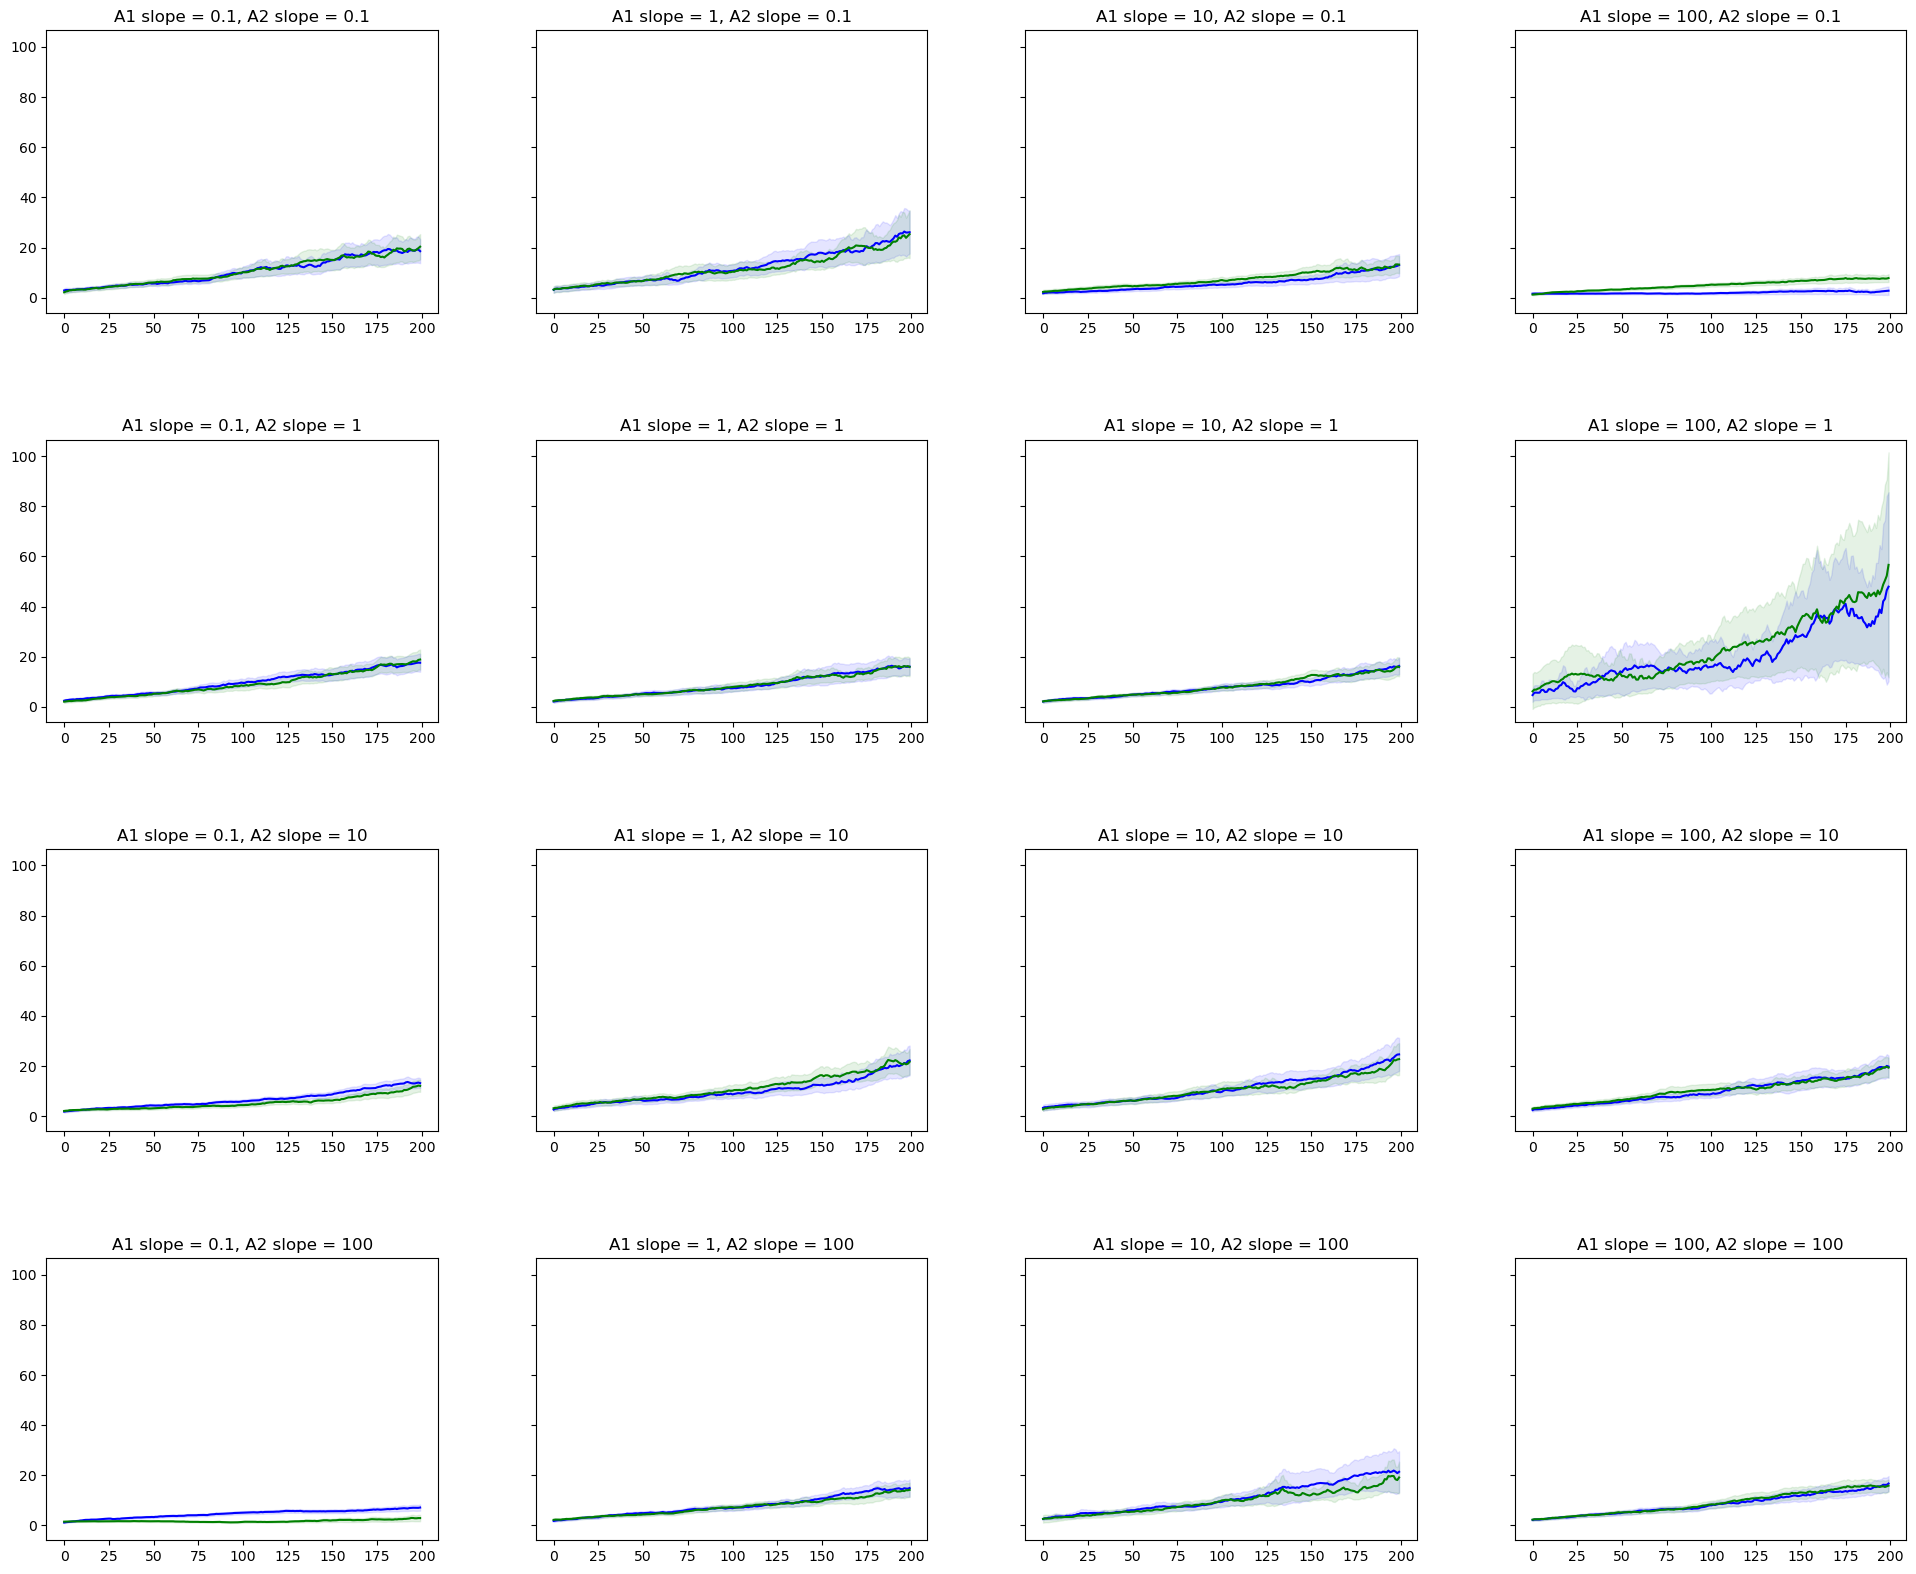

In [36]:
# np.random.seed(181)
w = 6; h = 5
ncols = 4
nrows = 4
param_vals = [i for i in range(0, ncols*nrows)]
tups = list(it.product(range(nrows), range(ncols)))
agents_slope = ["0.1","1", "10", "100"]
agents1 = [agent102,agent104,agent108,agent116]
agents2 = [agent202,agent204,agent208,agent216]
fig, ax = plt.subplots(nrows, ncols, figsize=(w*ncols, h*nrows), dpi=100,
                       sharey=True)#, sharex=True)
plt.subplots_adjust(wspace=0.25,hspace=0.45)
experiments = 200
trials = 200
time = [i for i in range(trials)]

for ix, param in enumerate(param_vals):
    agent1_errors = []
    agent2_errors = []
    for e in range(experiments):
        # experiments
        agent102 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_102,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)
        plant1 = Plant(transition_matrix=T1, transition_function=transition, state=behav_1)

        agent104 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_104,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)

        agent108 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_108,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)

        agent116 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_116,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B1, 
        system_estimate=A1, reference=R1, init_behavior=behav_1)



        agent202 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_202,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=behav_2)
        plant2 = Plant(transition_matrix=T2, transition_function=transition, state=behav_2)

        agent204 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_204,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=behav_2)

        agent208 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_208,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=behav_2)

        agent216 = Control_node(sensor=sense, comparator=compare, control_update=control_update, reference_update=reference_update_216,
        controller = control, internal_model=imc, internal_model_update=imc_update, behavioral_model=B2, 
        system_estimate=A2, reference=R2, init_behavior=behav_2)
        b1 = behav_1
        b2 = behav_2

        agent2 = agents1[param%4]
        agent1 = agents2[int(((param - (param%4)))/ncols)]
        agent1_error = []
        agent2_error = []
        for t in range(trials):
            color1 = [0.1,0.2,0.8, (t+1)/(trials+1)]
            color2 = [0.1,0.8,0.2, (t+1)/(trials+1)]
            #pl.scatter(agent1.get_reference()[0],-0.03, c=color1, edgecolors=[0.8,0.1,0.1, color1[1]])
            #pl.scatter(agent2.get_reference()[0],0, c=color2, edgecolors=[0.8,0.1,0.1, color2[3]], linewidth=1.5)
            b1_control = agent1.go(b2)   
            b2_control = agent2.go(b1)

            # agent1_control.append(agent1.get_output())
            # agent2_control.append(agent2.get_output())

            b1 = plant1.transition(b1_control)
            b2 = plant2.transition(b2_control)

            # agent1_behaviors.append(b1)
            # agent2_behaviors.append(b2)

            agent1_error.append(np.absolute(R1-b2))
            agent2_error.append(np.absolute(R2-b1))

            # agent1_reference.append(agent1.get_reference()[0])
            # agent2_reference.append(agent2.get_reference()[0])
        # aggregate the errors across experiments
        agent1_errors.append(agent1_error)
        agent2_errors.append(agent2_error)

    error1_mat = np.array(agent1_errors)
    error2_mat = np.array(agent2_errors)

    mean_error1 = np.average(error1_mat, axis=0)
    mean_error2 = np.average(error2_mat, axis=0)
    std_error1  = error1_mat.std(0)
    std_error2  = error2_mat.std(0)
    t = [n for n in range(trials)]
    ci1 = 1.96 * std_error1/np.sqrt(trials)
    ci2 = 1.96 * std_error2/np.sqrt(trials)

    upper1 = mean_error1+ci1
    lower1 = mean_error1-ci1
    upper1 = upper1.reshape(trials,)
    lower1 = lower1.reshape(trials,)
    upper2 = mean_error2+ci2
    lower2 = mean_error2-ci2
    upper2 = upper2.reshape(trials,)
    lower2 = lower2.reshape(trials,)
    # fig, ax = plt.subplots()
    # ax.plot(t,mean_error1, 'b',label="Agent 1")
    # ax.plot(t,mean_error2, 'g', label="Agent 2")
    # ax.fill_between(t, lower1, upper1, color='b', alpha=.1)
    # ax.fill_between(t, lower2, upper2, color='g', alpha=.1)

    ai = tups[ix]
    
    # plots
    ax[ai].plot(time, mean_error1, 'b',label="Agent 1")
    ax[ai].plot(time, mean_error2, 'g', label="Agent 2")
    ax[ai].fill_between(t, lower1, upper1, color='b', alpha=.1)
    ax[ai].fill_between(t, lower2, upper2, color='g', alpha=.1)
    ax[ai].set_title('A1 slope = {}, A2 slope = {}'.format(agents_slope[param%4], agents_slope[int(((param - (param%4)))/ncols)]))
    # ax[ai].set_xlim(0,t)
    # ax[ai].set_ylim(0,1)
    ax[ai].tick_params(axis='x')
    ax[ai].tick_params(axis='y')

print("\n Sigmoid Model Agents (Error Relative to Base Preferences)")
print("Agent 1 base reference: {}".format(R1))
print("Agent 2 base reference: {}".format(R2))
plt.show()